# Case Study 2 : Data Science in Financial Data

**Recommended Readings:** 
* [Quantopian Tutorials](https://www.quantopian.com/tutorials/) 
* Please register an account in [Quantopian online notebook system](https://www.quantopian.com/notebooks/).
* Upload this file into the system and start working on your idea.


**NOTE**
* Please download your code (notebook file as an ipynb file) and include it in your submission.


# Problem: pick a data science problem that you plan to solve using Stock Price Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data available and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

In [8]:
# In order to make money off of stocks, you want to diversify your portfolio. Essentially, this means you want to invest money
# in a number of unrelated stocks, in order to decrease the risk of losing money if one of your stocks loses value. Having 
# funds invested in a number of related stocks increases the chance that all of your stocks decrease in value at the same time.

# In this section of the project, we attempt to discover correlations in the DOW 30 stocks. We compare each possible pair of 
# stocks in an attempt to find correlated stocks. The DOW 30 set of stocks is seen as a good representative for the stock
# market as a whole. If we can find correlations in these stocks, it is possible that similar algorithms may be used to find
# correlations in the stock market as a whole, leading to more thoughtful investing.

# Data Collection/Processing: 

In [28]:
#----------------------------------------------
# import relevant libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# import weekly, monthly data for the stocks
weekly = pd.read_csv("data_weekly.csv")
monthly = pd.read_csv("data_monthly.csv")


# make dataframe for weekly stock info
AAPL = pd.concat([weekly.iloc[:,0], weekly.iloc[:,3]], axis=1)
AXP = pd.concat([weekly.iloc[:,0], weekly.iloc[:,19]], axis=1)
BA =pd.concat([weekly.iloc[:,0], weekly.iloc[:,1]], axis=1)
CAT = pd.concat([weekly.iloc[:,0], weekly.iloc[:,14]], axis=1)
CSCO = pd.concat([weekly.iloc[:,0], weekly.iloc[:,28]], axis=1)
CVX = pd.concat([weekly.iloc[:,0], weekly.iloc[:,20]], axis=1)
DIS = pd.concat([weekly.iloc[:,0], weekly.iloc[:,11]], axis=1)
GS = pd.concat([weekly.iloc[:,0], weekly.iloc[:,5]], axis=1)
HD = pd.concat([weekly.iloc[:,0], weekly.iloc[:,4]], axis=1)
IBM = pd.concat([weekly.iloc[:,0], weekly.iloc[:,12]], axis=1)
INTC = pd.concat([weekly.iloc[:,0], weekly.iloc[:,27]], axis=1)
JNJ = pd.concat([weekly.iloc[:,0], weekly.iloc[:,15]], axis=1)
JPM = pd.concat([weekly.iloc[:,0], weekly.iloc[:,17]], axis=1)
KO = pd.concat([weekly.iloc[:,0], weekly.iloc[:,26]], axis=1)
MMM = pd.concat([weekly.iloc[:,0], weekly.iloc[:,8]], axis=1)
MCD = pd.concat([weekly.iloc[:,0], weekly.iloc[:,6]], axis=1)
MRK = pd.concat([weekly.iloc[:,0], weekly.iloc[:,22]], axis=1)
MSFT = pd.concat([weekly.iloc[:,0], weekly.iloc[:,9]], axis=1)
NKE = pd.concat([weekly.iloc[:,0], weekly.iloc[:,21]], axis=1)
PFE = pd.concat([weekly.iloc[:,0], weekly.iloc[:,30]], axis=1)
PG = pd.concat([weekly.iloc[:,0], weekly.iloc[:,16]], axis=1)
TRV = pd.concat([weekly.iloc[:,0], weekly.iloc[:,13]], axis=1)
UNH = pd.concat([weekly.iloc[:,0], weekly.iloc[:,2]], axis=1)
UTX = pd.concat([weekly.iloc[:,0], weekly.iloc[:,10]], axis=1)
V = pd.concat([weekly.iloc[:,0], weekly.iloc[:,7]], axis=1)
VZ = pd.concat([weekly.iloc[:,0], weekly.iloc[:,24]], axis=1)
WBA = pd.concat([weekly.iloc[:,0], weekly.iloc[:,25]], axis=1)
WMT = pd.concat([weekly.iloc[:,0], weekly.iloc[:,18]], axis=1)
XOM = pd.concat([weekly.iloc[:,0], weekly.iloc[:,23]], axis=1)

V = V.iloc[428:]

# make dataframes for relevant monthly stock info
AAPL_monthly = pd.concat([monthly.iloc[:,0], monthly.iloc[:,3]], axis=1)
AXP_monthly = pd.concat([monthly.iloc[:,0], monthly.iloc[:,19]], axis=1)
CAT_monthly = pd.concat([monthly.iloc[:,0], monthly.iloc[:,14]], axis=1)
CVX_monthly = pd.concat([monthly.iloc[:,0], monthly.iloc[:,20]], axis=1)
GS_monthly = pd.concat([monthly.iloc[:,0], monthly.iloc[:,5]], axis=1)
JPM_monthly = pd.concat([monthly.iloc[:,0], monthly.iloc[:,17]], axis=1)
MMM_monthly = pd.concat([monthly.iloc[:,0], monthly.iloc[:,8]], axis=1)
MRK_monthly = pd.concat([monthly.iloc[:,0], monthly.iloc[:,22]], axis=1)
PFE_monthly = pd.concat([monthly.iloc[:,0], monthly.iloc[:,30]], axis=1)
PG_monthly = pd.concat([monthly.iloc[:,0], monthly.iloc[:,16]], axis=1)
UNH_monthly = pd.concat([monthly.iloc[:,0], monthly.iloc[:,2]], axis=1)
UTX_monthly = pd.concat([monthly.iloc[:,0], monthly.iloc[:,10]], axis=1)
XOM_monthly = pd.concat([monthly.iloc[:,0], monthly.iloc[:,23]], axis=1)


weekly_data = [AAPL, AXP, BA, CAT, CSCO, CVX, DIS, GS, HD, IBM, INTC, JNJ, JPM, KO, MMM, MCD, MRK, MSFT, NKE, PFE, PG, TRV, UNH, UTX, V, VZ, WBA, WMT, XOM]
monthly_data = [AAPL_monthly, AXP_monthly, CAT_monthly, CVX_monthly, GS_monthly, JPM_monthly, MMM_monthly, MRK_monthly, PFE_monthly, PG_monthly, UNH_monthly, UTX_monthly, XOM_monthly]


#formatting the data

for i in range(len(weekly_data)):
    weekly_data[i].columns = ['Date', 'Price']
    
for i in range(len(monthly_data)):
    monthly_data[i].columns = ['Date', 'Price']

for i in range(len(weekly_data)):
    # calculate continuous target feature
    weekly_data[i]['Price Change'] = weekly_data[i]['Price'].pct_change().shift(-1)
    # calculate discrete target features
    weekly_data[i]['Price Increased'] = (weekly_data[i]['Price Change'] > 0).astype(int)
    weekly_data[i]['Price Stayed'] = (weekly_data[i]['Price Change'] == 0).astype(int)
    weekly_data[i]['Price Decreased'] = (weekly_data[i]['Price Change'] < 0).astype(int)

    
for i in range(len(monthly_data)):
    # calculate continuous target feature
    monthly_data[i]['Price Change'] = monthly_data[i]['Price'].pct_change().shift(-1)
    # calculate discrete target features
    monthly_data[i]['Price Increased'] = (monthly_data[i]['Price Change'] > 0).astype(int)
    monthly_data[i]['Price Stayed'] = (monthly_data[i]['Price Change'] == 0).astype(int)
    monthly_data[i]['Price Decreased'] = (monthly_data[i]['Price Change'] < 0).astype(int)

# Data Exploration: Exploring the Dataset

**plot the weekly returns of a set of stocks of your choice** 


In [10]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary










# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

In [11]:
# Now that we have the price change data concatinated into a single list, we will compare all the stocks pair-wise in order to
# find correlations in their behavior

Write codes to implement the solution in python:

In [24]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

same_behavior = []
different_behavior = []

# iterate over all the DOW 30 stocks
for i in range(29):
    # compare each stock with the ones following it in the list
    for j in range(i, 29):
        # merge the dataframes and see if the info matches
        check = pd.merge(weekly_data[i], weekly_data[j], on='Date', how='inner')
        same_count = 0
        different_count = 0
        rows = check.shape[0]
        for k in range(rows):
            # check if they behave the same way
            if check.iloc[k, 3] == check.iloc[k, 8] and check.iloc[k, 4] == check.iloc[k, 9] and check.iloc[k, 5] == check.iloc[k, 10]:
                same_count += 1
            # check if they behave in opposite ways
            if check.iloc[k, 3] == check.iloc[k, 10] and check.iloc[k, 5] == check.iloc[k, 8]:
                different_count += 1
            
        # We chose 72.3% similarity because it yields the 5 pairs with the highest similarity in behavior
        if same_count >= (0.723 * rows) and i != j and same_count != 0:
            same_behavior.append((i,j, same_count/rows))
            
        # We chose 42.8% difference because it yields 5 pairs with the most different behavior
        if different_count >= (0.428 * rows) and different_count != 0:
            different_behavior.append((i,j, different_count/rows))

print('Stocks with at least 72.3% similar behavior are: ', same_behavior)
print('Stocks with at least 42.8% different behavior are: ', different_behavior)

Stocks with at least 68% similar behavior are:  [(1, 7, 0.7242044358727098), (3, 23, 0.7251687560270009), (5, 28, 0.8023143683702989), (7, 12, 0.7531340405014465), (14, 23, 0.7579556412729026)]
Stocks with at least 42% different behavior are:  [(0, 16, 0.43201542912246865), (0, 19, 0.43972999035679844), (0, 20, 0.4339440694310511), (7, 20, 0.4416586306653809), (20, 22, 0.42912246865959497)]


# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


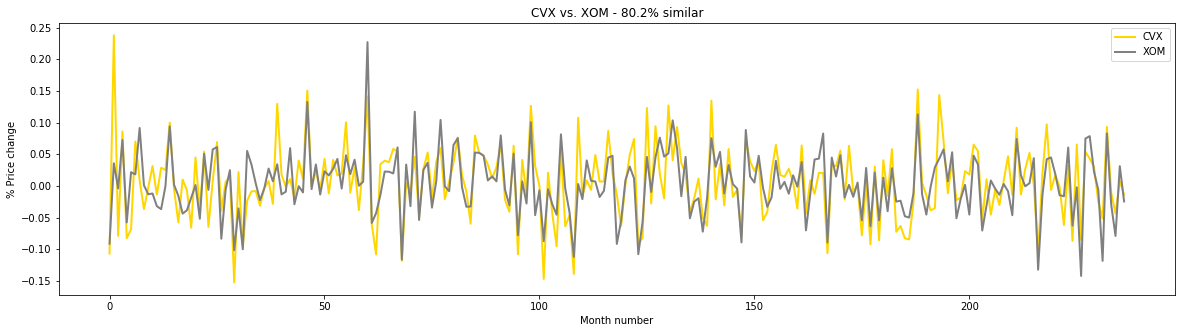

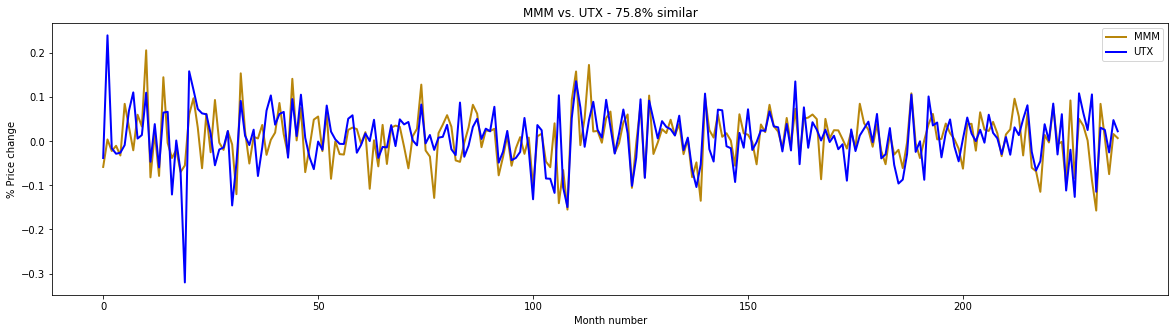

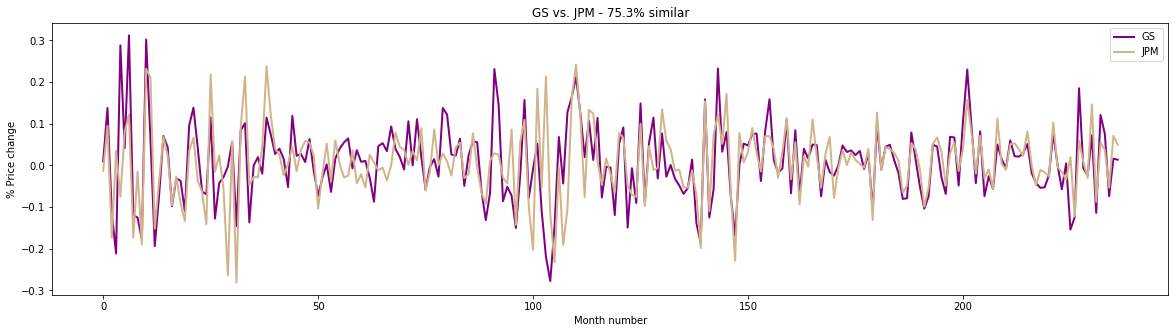

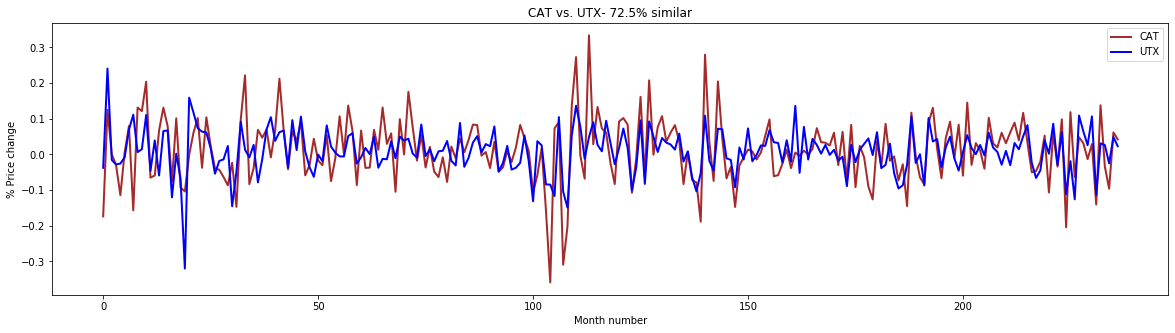

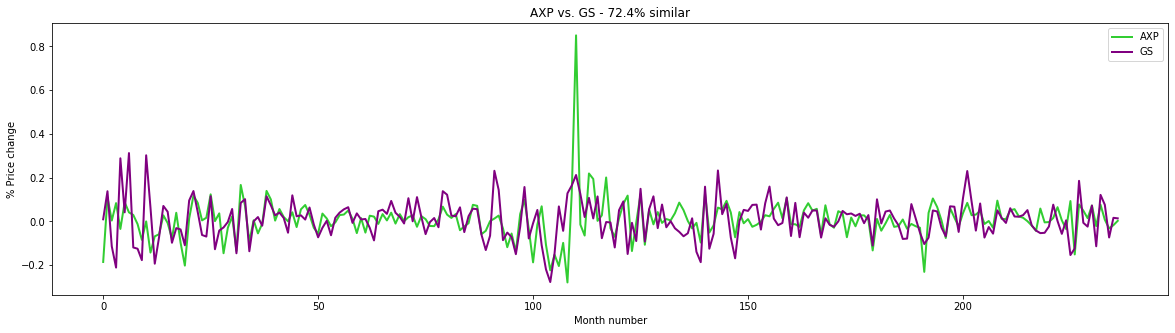

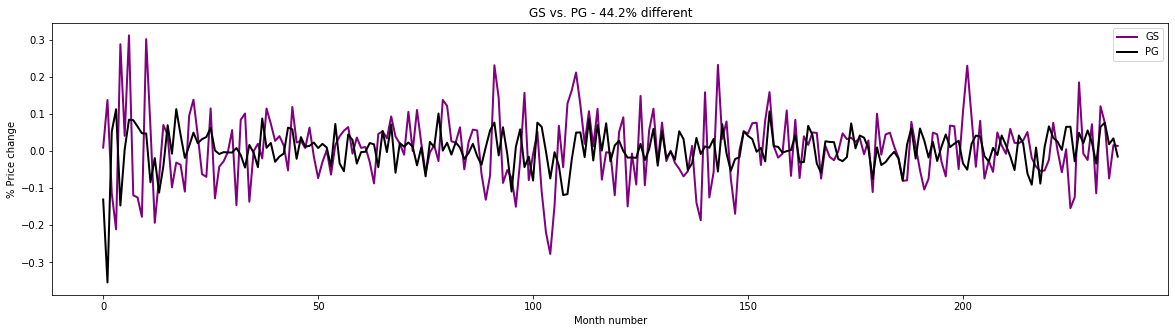

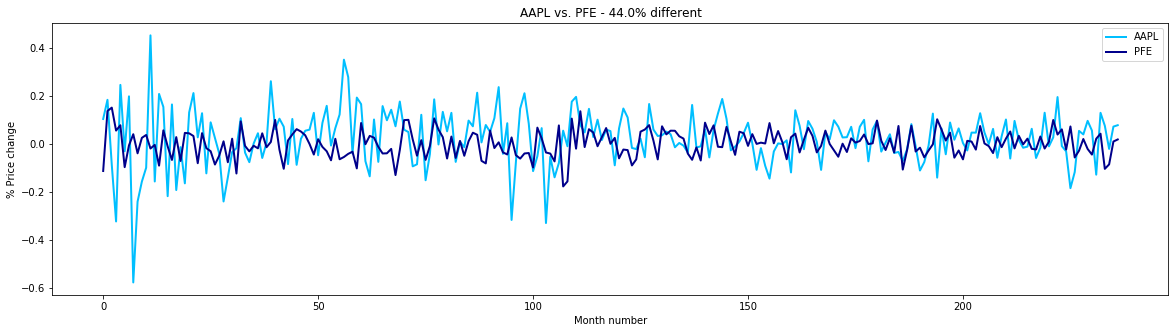

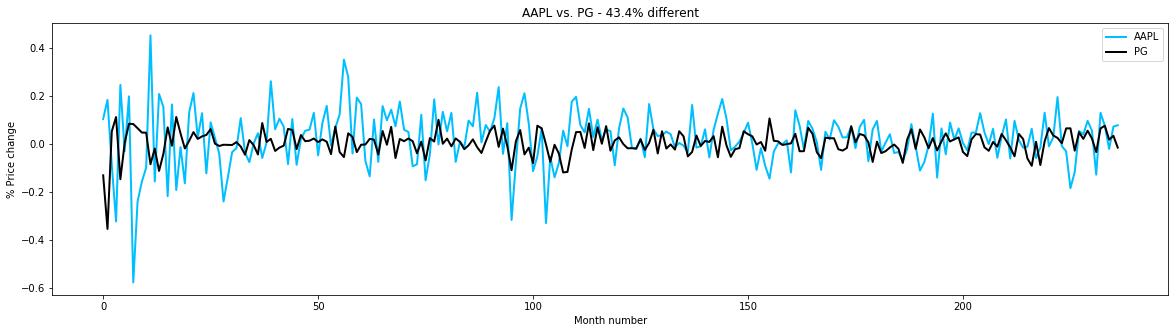

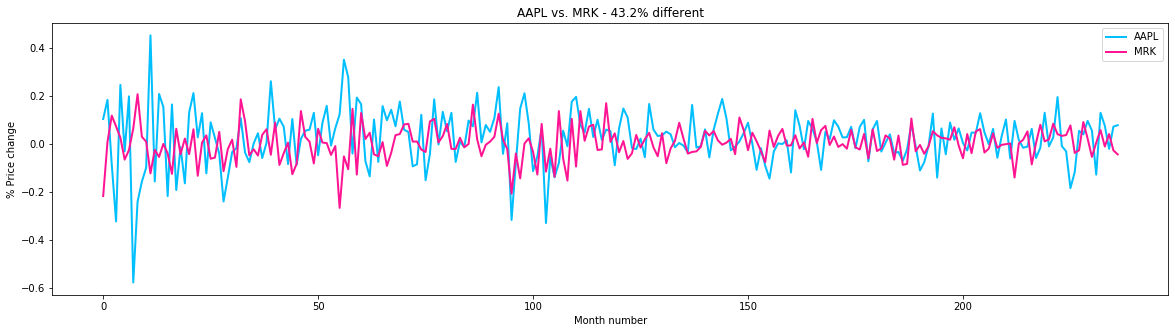

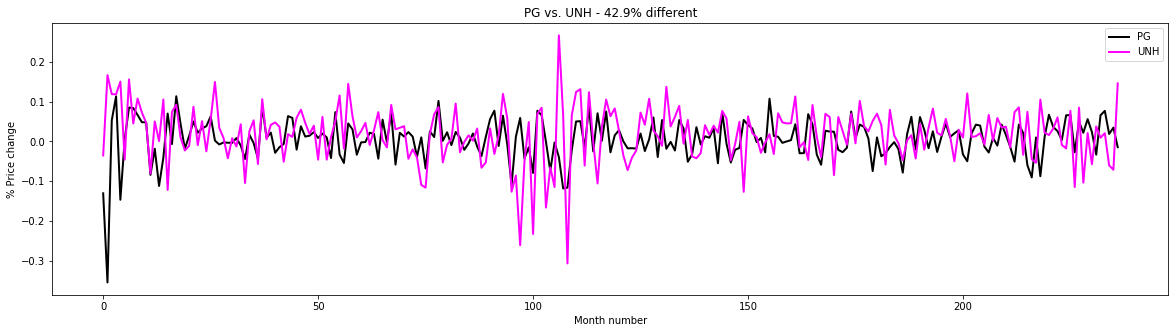

In [32]:
import matplotlib.pyplot as plt

# plotting the monthly behavior of the similar pairs (descending similarity)

# pair (5, 28) - CVX and XOM - 80.2%
CVX_XOM = pd.merge(monthly_data[3], monthly_data[12], on='Date', how='inner')
fig = plt.figure(figsize=(20,5))
CVX_line = plt.plot(CVX_XOM['Price Change_x'], color = 'gold', linewidth=2, label='CVX')
XOM_line = plt.plot(CVX_XOM['Price Change_y'], color = 'grey', linewidth=2, label='XOM')
plt.title('CVX vs. XOM - 80.2% similar')
plt.xlabel('Month number')
plt.ylabel('% Price change')
plt.legend(loc='best')
plt.show()

# pair (14,23)) - MMM and UTX- 75.8%
MMM_UTX = pd.merge(monthly_data[6], monthly_data[11], on='Date', how='inner')
fig = plt.figure(figsize=(20,5))
MMM_line = plt.plot(MMM_UTX['Price Change_x'], color = 'darkgoldenrod', linewidth=2, label='MMM')
UTX_line = plt.plot(MMM_UTX['Price Change_y'], color = 'blue', linewidth=2, label='UTX')
plt.title('MMM vs. UTX - 75.8% similar')
plt.xlabel('Month number')
plt.ylabel('% Price change')
plt.legend(loc='best')
plt.show()

# pair (7, 12) - GS and JPM - 75.3%
GS_JPM = pd.merge(monthly_data[4], monthly_data[5], on='Date', how='inner')
fig = plt.figure(figsize=(20,5))
GS_line = plt.plot(GS_JPM['Price Change_x'], color = 'purple', linewidth=2, label='GS')
JPM_line = plt.plot(GS_JPM['Price Change_y'], color = 'tan', linewidth=2, label='JPM')
plt.title('GS vs. JPM - 75.3% similar')
plt.xlabel('Month number')
plt.ylabel('% Price change')
plt.legend(loc='best')
plt.show()

# pair (3, 23) - CAT and UTX - 72.5%
CAT_UTX = pd.merge(monthly_data[2], monthly_data[11], on='Date', how='inner')
fig = plt.figure(figsize=(20,5))
CAT_line = plt.plot(CAT_UTX['Price Change_x'], color = 'brown', linewidth=2, label='CAT')
UTX_line = plt.plot(CAT_UTX['Price Change_y'], color = 'blue', linewidth=2, label='UTX')
plt.title('CAT vs. UTX- 72.5% similar')
plt.xlabel('Month number')
plt.ylabel('% Price change')
plt.legend(loc='best')
plt.show()

# pair (1, 7)- AXP and GS - 72.4%
AXP_GS = pd.merge(monthly_data[1], monthly_data[4], on='Date', how='inner')
fig = plt.figure(figsize=(20,5))
AXP_line = plt.plot(AXP_GS['Price Change_x'], color = 'limegreen', linewidth=2, label='AXP')
GS_line = plt.plot(AXP_GS['Price Change_y'], color = 'purple', linewidth=2, label='GS')
plt.title('AXP vs. GS - 72.4% similar')
plt.xlabel('Month number')
plt.ylabel('% Price change')
plt.legend(loc='best')
plt.show()


# plotting the monthly behavior of the different pairs (descending difference)

# pair (7, 20) - GS and PG - 44.2%
GS_PG = pd.merge(monthly_data[4], monthly_data[9], on='Date', how='inner')
fig = plt.figure(figsize=(20,5))
GS_line = plt.plot(GS_PG['Price Change_x'], color = 'purple', linewidth=2, label='GS')
PG_line = plt.plot(GS_PG['Price Change_y'], color = 'black', linewidth=2, label='PG')
plt.title('GS vs. PG - 44.2% different')
plt.xlabel('Month number')
plt.ylabel('% Price change')
plt.legend(loc='best')
plt.show()

# pair (0, 19) - AAPL and PFE - 44.0%
AAPL_PFE = pd.merge(monthly_data[0], monthly_data[8], on='Date', how='inner')
fig = plt.figure(figsize=(20,5))
AAPL_line = plt.plot(AAPL_PFE['Price Change_x'], color = 'deepskyblue', linewidth=2, label='AAPL')
PFE_line = plt.plot(AAPL_PFE['Price Change_y'], color = 'darkblue', linewidth=2, label='PFE')
plt.title('AAPL vs. PFE - 44.0% different')
plt.xlabel('Month number')
plt.ylabel('% Price change')
plt.legend(loc='best')
plt.show()

# pair (0, 20) - AAPL and PG - 43.4%
AAPL_PG = pd.merge(monthly_data[0], monthly_data[9], on='Date', how='inner')
fig = plt.figure(figsize=(20,5))
AAPL_line = plt.plot(AAPL_PG['Price Change_x'], color = 'deepskyblue', linewidth=2, label='AAPL')
PG_line = plt.plot(AAPL_PG['Price Change_y'], color = 'black', linewidth=2, label='PG')
plt.title('AAPL vs. PG - 43.4% different')
plt.xlabel('Month number')
plt.ylabel('% Price change')
plt.legend(loc='best')
plt.show()

# pair (0, 16) - AAPL and MRK - 43.2%
AAPL_MRK = pd.merge(monthly_data[0], monthly_data[7], on='Date', how='inner')
fig = plt.figure(figsize=(20,5))
AAPL_line = plt.plot(AAPL_MRK['Price Change_x'], color = 'deepskyblue', linewidth=2, label='AAPL')
MRK_line = plt.plot(AAPL_MRK['Price Change_y'], color = 'deeppink', linewidth=2, label='MRK')
plt.title('AAPL vs. MRK - 43.2% different')
plt.xlabel('Month number')
plt.ylabel('% Price change')
plt.legend(loc='best')
plt.show()

# pair (20,22) - PG and UNH - 42.9%
PG_UNH = pd.merge(monthly_data[9], monthly_data[10], on='Date', how='inner')
fig = plt.figure(figsize=(20,5))
PG_line = plt.plot(PG_UNH['Price Change_x'], color = 'black', linewidth=2, label='PG')
UNH_line = plt.plot(PG_UNH['Price Change_y'], color = 'fuchsia', linewidth=2, label='UNH')
plt.title('PG vs. UNH - 42.9% different')
plt.xlabel('Month number')
plt.ylabel('% Price change')
plt.legend(loc='best')
plt.show()






# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides to present about the case study . Each team present their case studies in class for 7 minutes.

Please compress all the files in a zipped file.


**How to submit:**

        Please submit through Canvas, in the Assignment "Case Study 2".
        
**Note: Each team only needs to submit one submission in Canvas**